In [1]:

import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(84).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(44).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(245).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/6.jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(238).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(196).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(108).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(310).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image (5).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(186).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(29).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(140).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(224).jpg

In [2]:
import keras 
from keras.models import Sequential 
from keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, Dropout
from sklearn.metrics import accuracy_score


In [3]:
from ipywidgets import widgets
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf

### **Directory Path**

In [4]:
X_data = []
Y_data = []
image_size = 150
categories = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

for category in categories:
    folder_path = os.path.join('/kaggle/input/brain-tumor-classification-mri/Training', category)
    for file_name in os.listdir(folder_path):
            img = cv2.imread(os.path.join(folder_path, file_name))
            img = cv2.resize(img, (image_size, image_size))
            X_data.append(img)
            Y_data.append(category)

for category in categories:
    folder_path = os.path.join('/kaggle/input/brain-tumor-classification-mri/Testing', category)
    for file_name in os.listdir(folder_path):
            img = cv2.imread(os.path.join(folder_path, file_name))
            img = cv2.resize(img, (image_size, image_size))
            X_data.append(img)
            Y_data.append(category)    

X_data = np.array(X_data)
Y_data = np.array(Y_data)


In [5]:
X_data, Y_data = shuffle(X_data, Y_data, random_state=101)
X_data.shape


(3264, 150, 150, 3)

### **Train Test Split**

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=0.1, random_state=101)


In [7]:
Y_data_new = []
for label in Y_train:
    Y_data_new.append(categories.index(label))
    
Y_data = Y_data_new
Y_data = tf.keras.utils.to_categorical(Y_data)

Y_test_new = []
for label in Y_test:
    Y_test_new.append(categories.index(label))
    
Y_test = Y_test_new
Y_test = tf.keras.utils.to_categorical(Y_test)


### **Convolutional Neural Network**

In [8]:
new_model = Sequential()
new_model.add(Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
new_model.add(Conv2D(64, (3,3), activation='relu'))
new_model.add(MaxPooling2D(2,2))
new_model.add(Dropout(0.3))
new_model.add(Conv2D(64, (3,3), activation='relu'))
new_model.add(Conv2D(64, (3,3), activation='relu'))
new_model.add(Dropout(0.3))
new_model.add(MaxPooling2D(2,2))
new_model.add(Dropout(0.3))
new_model.add(Conv2D(128, (3,3), activation='relu'))
new_model.add(Conv2D(128, (3,3), activation='relu'))
new_model.add(Conv2D(128, (3,3), activation='relu'))
new_model.add(MaxPooling2D(2,2))
new_model.add(Dropout(0.3))
new_model.add(Conv2D(128, (3,3), activation='relu'))
new_model.add(Conv2D(256, (3,3), activation='relu'))
new_model.add(MaxPooling2D(2,2))
new_model.add(Dropout(0.3))
new_model.add(Flatten())
new_model.add(Dense(512, activation='relu'))
new_model.add(Dense(512, activation='relu'))
new_model.add(Dropout(0.3))
new_model.add(Dense(4, activation='softmax'))


In [9]:
new_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 73, 73, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 73, 73, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 69, 69, 64)        36928     
                                                        

In [10]:
new_model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])


In [11]:
history = new_model.fit(X_train, Y_train, epochs=20, validation_split=0.1)


Epoch 1/20


2023-03-19 16:38:54.283406: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


83/83 [==============================] - 16s 64ms/step - loss: 2.5510 - accuracy: 0.2978 - val_loss: 1.2999 - val_accuracy: 0.4456
Epoch 2/20
83/83 [==============================] - 4s 53ms/step - loss: 1.1491 - accuracy: 0.4964 - val_loss: 0.9866 - val_accuracy: 0.5748
Epoch 3/20
83/83 [==============================] - 4s 53ms/step - loss: 0.9801 - accuracy: 0.5649 - val_loss: 0.8775 - val_accuracy: 0.6735
Epoch 4/20
83/83 [==============================] - 4s 53ms/step - loss: 0.8844 - accuracy: 0.6156 - val_loss: 0.8214 - val_accuracy: 0.6190
Epoch 5/20
83/83 [==============================] - 4s 53ms/step - loss: 0.7586 - accuracy: 0.6667 - val_loss: 0.6413 - val_accuracy: 0.7619
Epoch 6/20
83/83 [==============================] - 4s 53ms/step - loss: 0.6239 - accuracy: 0.7544 - val_loss: 0.5222 - val_accuracy: 0.8095
Epoch 7/20
83/83 [==============================] - 4s 53ms/step - loss: 0.5141 - accuracy: 0.8006 - val_loss: 0.5044 - val_accuracy: 0.7925
Epoch 8/20
83/83 [=====

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

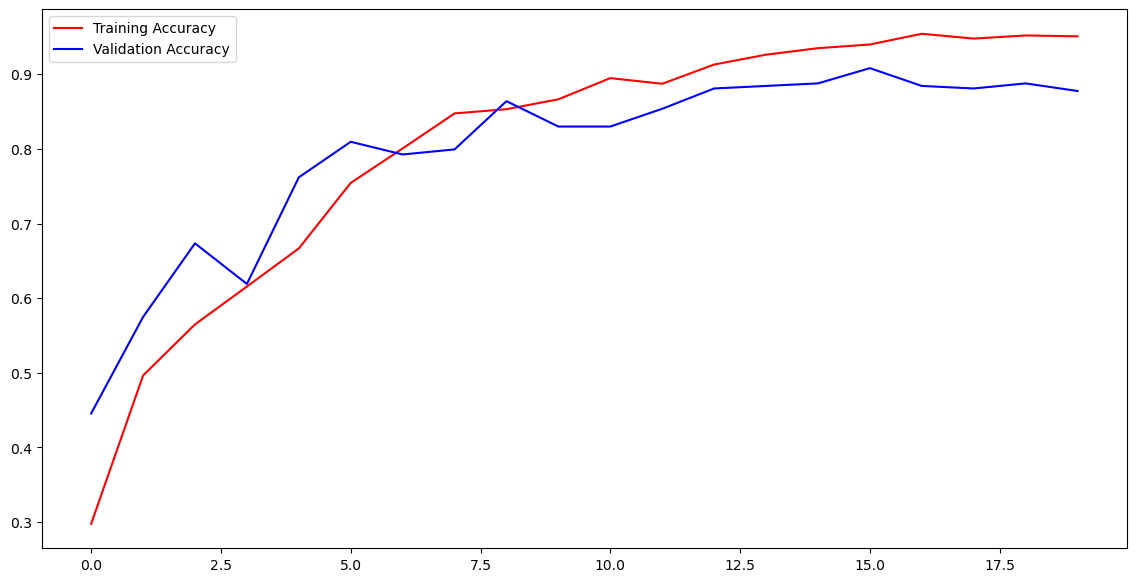

In [13]:
# Save the trained model
new_model.save('braintumor.h5')

# Plot training/validation accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(14, 7))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()


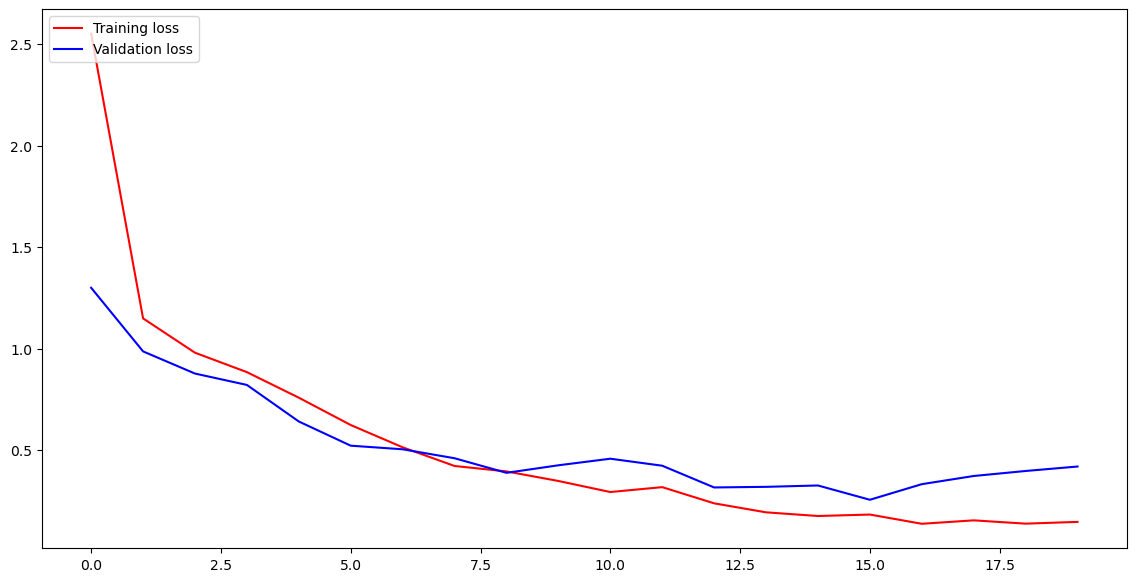

In [14]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))

fig = plt.figure(figsize=(14, 7))
plt.plot(epochs, loss, 'r', label="Training loss")
plt.plot(epochs, val_loss, 'b', label="Validation loss")
plt.legend(loc='upper left')
plt.show()


### **Prediction**

In [15]:
import cv2
import numpy as np

img = cv2.imread('/kaggle/input/brain-tumor-classification-mri/Training/pituitary_tumor/p (118).jpg')
img = cv2.resize(img, (150, 150))
img_array = np.array(img)
img_array.shape


(150, 150, 3)

In [16]:
img_array = img_array.reshape(1, 150, 150, 3)
img_array.shape


(1, 150, 150, 3)

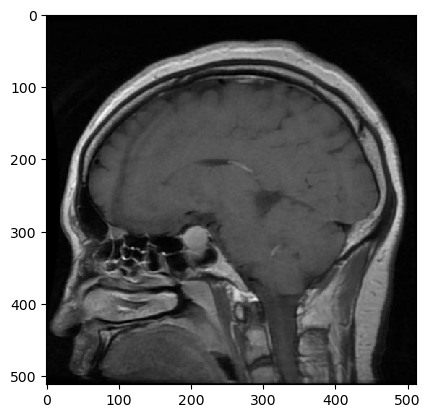

In [17]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

img = image.load_img('/kaggle/input/brain-tumor-classification-mri/Training/pituitary_tumor/p (123).jpg')
plt.imshow(img, interpolation='nearest')
plt.show()


In [18]:
import numpy as np

# Make prediction
predictions = new_model.predict(img_array)

# Get the index of the highest probability prediction
predicted_class_index = np.argmax(predictions)

predicted_class_index


1/1 [==============================] - 0s 256ms/step


3